In [134]:
# Add packages
using Pkg
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("GLM")
Pkg.add("DataFrames")
Pkg.add("LaTeXStrings")
Pkg.add("Statistics")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`


LoadError: The following package names could not be resolved:
 * LLaTeXStrings (not found in project, manifest or registry)

In [266]:
using Plots
using Random
using GLM
using DataFrames
using LaTeXStrings
using Statistics

In [234]:
W = rand(Float64,1000);
W = sort(W);
W

1000-element Vector{Float64}:
 7.948121414735887e-5
 0.000822666460465582
 0.0011366682441129594
 0.0025136313489513284
 0.005970419609714561
 0.008086882832906594
 0.011504647504823162
 0.012480977746953448
 0.014785773973273408
 0.01496464991092683
 0.015467834622915344
 0.015950796689191193
 0.016739615621967574
 ⋮
 0.9865498479469612
 0.9875920905365031
 0.9894271197859238
 0.9909358991710244
 0.990984099062813
 0.9918893024914223
 0.9921658636461729
 0.9958485358738084
 0.9959968790090739
 0.9965420903753855
 0.9981090268462216
 0.9996835513986371

In [235]:
e = randn(1000);
e

1000-element Vector{Float64}:
  1.5720134079450463
 -0.2391818290344134
 -1.0695044785287051
  0.47325271297246957
  0.9631192559838228
  0.8213999700518065
 -1.2615882776198306
 -1.992256569396191
 -0.8686688750470754
 -1.0749306507131917
 -0.31975041724329173
 -1.0399952872420468
 -0.15868620326043076
  ⋮
  0.4071418411908366
 -0.47753753999820236
  1.1484848299916448
  0.7365459221824647
 -1.0925009211692638
 -1.657037256549267
 -0.6715868619345826
 -0.647652006455646
  1.1269760346371356
  0.4083982743782652
 -0.5813408113304381
  3.4906548699344855

In [236]:
y = exp.(4W) + e;

In [237]:
data = DataFrame([y;;W],["y","W"])

Row,y,W
,Float64,Float64
1,2.57233,7.94812e-5
2,0.764114,0.000822666
3,-0.0649475,0.00113667
4,1.48336,0.00251363
5,1.98729,0.00597042
6,1.85428,0.00808688
7,-0.214494,0.0115046
8,-0.941065,0.012481
9,0.192258,0.0147858


In [241]:
model = lm(@formula(y~W),data)
y_hat = predict(model,select(data,"W"));

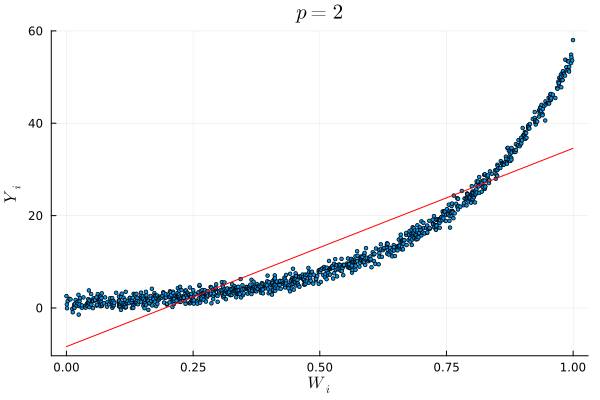

In [242]:
scatter(W,y, label = false,  ms=2)
plot!(W,y_hat, label = false, lc=:red)
xlabel!(L"W_i")
ylabel!(L"Y_i")
title!(L"p=2")

In [243]:
W_2 = [W;; W.^2]
data = DataFrame([y;;W_2],["y","W","W^2"])

Row,y,W,W^2
,Float64,Float64,Float64
1,2.57233,7.94812e-5,6.31726e-9
2,0.764114,0.000822666,6.7678e-7
3,-0.0649475,0.00113667,1.29201e-6
4,1.48336,0.00251363,6.31834e-6
5,1.98729,0.00597042,3.56459e-5
6,1.85428,0.00808688,6.53977e-5
7,-0.214494,0.0115046,0.000132357
8,-0.941065,0.012481,0.000155775
9,0.192258,0.0147858,0.000218619


In [244]:
model = lm(@formula(y~ W + W^2),data)
y_hat = predict(model,select(data,["W","W^2"]));

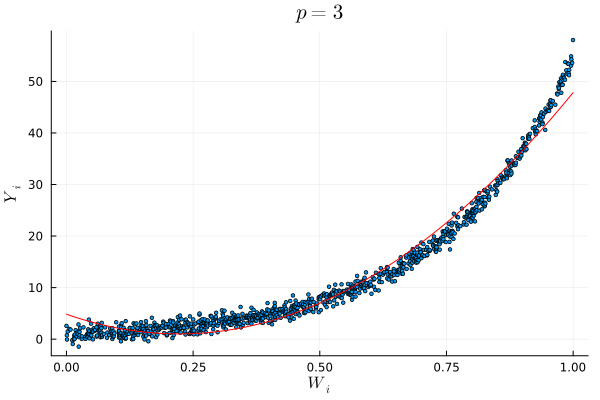

In [245]:
scatter(W,y, label = false,  ms=2)
plot!(W,y_hat, label = false, lc=:red)
xlabel!(L"W_i")
ylabel!(L"Y_i")
title!(L"p=3")

In [246]:
W_3 = [W_2;; W.^3]
data = DataFrame([y;;W_3],["y","W","W^2","W^3"])

Row,y,W,W^2,W^3
,Float64,Float64,Float64,Float64
1,2.57233,7.94812e-5,6.31726e-9,5.02104e-13
2,0.764114,0.000822666,6.7678e-7,5.56764e-10
3,-0.0649475,0.00113667,1.29201e-6,1.46859e-9
4,1.48336,0.00251363,6.31834e-6,1.5882e-8
5,1.98729,0.00597042,3.56459e-5,2.12821e-7
6,1.85428,0.00808688,6.53977e-5,5.28863e-7
7,-0.214494,0.0115046,0.000132357,1.52272e-6
8,-0.941065,0.012481,0.000155775,1.94422e-6
9,0.192258,0.0147858,0.000218619,3.23245e-6


In [248]:
model = lm(@formula(y~ W + W^2 + W^3),data)
y_hat = predict(model,select(data,["W","W^2","W^3"]));

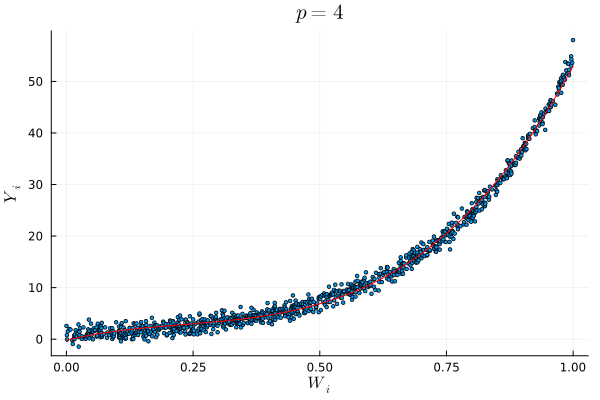

In [249]:
scatter(W,y, label = false,  ms=2)
plot!(W,y_hat, label = false, lc=:red)
xlabel!(L"W_i")
ylabel!(L"Y_i")
title!(L"p=4")

## 2. Overfitting

In [268]:
X = randn(1000,1000-1);
y = randn(1000);
print(size(X)) 
print(size(y))

(1000, 999)(1000,)

In [269]:
data = DataFrame([y;;X],:auto)
rename!(data, :x1 => :y)

Row,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.487082,-1.16085,1.27991,-0.0181,-0.753914,0.381587,-1.57252,-0.299612,1.33359,-0.568269,-0.730327,-0.426176,0.297191,1.19109,0.765216,2.02821,0.634639,-1.78987,1.03485,-0.0421354,-0.449682,0.13294,0.254633,0.329585,-0.940127,1.77579,-2.15392,0.187097,-0.530376,0.306165,0.204349,1.12577,0.363476,-0.0888203,-1.88738,0.485267,-0.0913174,-1.202,-0.679723,1.12259,-0.266324,0.126311,-1.30888,0.862583,-1.35883,-0.350363,2.10623,-1.42363,1.63153,-0.4045,-0.762617,-0.716901,-1.29294,0.432406,1.21513,0.854723,0.288862,0.501602,-0.451238,1.42019,0.645186,0.760698,-0.210465,0.90387,0.0714706,-0.0132984,-0.699523,-1.56968,-0.815897,0.415114,0.954303,-0.175956,0.385671,0.34237,0.241255,0.615094,-0.234323,1.67493,-0.119379,0.394526,-0.112053,-0.0987533,-1.08731,-1.05699,-0.931451,-1.7206,-0.992276,0.963404,-0.132396,-0.0206135,-1.35674,0.538007,-0.152265,-1.44785,1.73304,-2.64818,0.285607,0.70539,-0.354142,-0.607813,⋯
2,-0.620178,-0.741164,-0.841497,-0.451858,-1.01387,0.246674,0.217464,0.846763,-2.00118,0.627984,-0.0217559,-0.533033,-1.02935,0.218251,0.455831,-0.271396,-0.165652,2.13087,-1.45801,0.185274,-1.29558,1.01682,-0.205611,0.813775,-0.290314,1.34535,-0.790286,-1.92065,1.30456,-1.12979,0.197806,-2.07679,-1.28355,0.0179692,-0.675702,0.00915605,-0.172414,-0.605477,-0.198576,1.44133,0.564489,0.731791,1.18729,1.04777,-0.453189,-1.06994,-1.04684,-0.811422,0.77165,-1.37766,0.546118,0.313105,1.38376,-0.570696,-1.71295,-1.31516,-0.226846,1.35205,1.50831,-0.0209461,-0.872035,-0.40266,-0.487607,-0.141239,-0.275466,-1.08425,0.101373,-0.758058,-0.398774,-1.3419,2.2647,0.879327,1.52116,1.11395,-1.0465,0.963039,-1.44723,1.17424,-0.176764,0.704506,-1.9643,-0.693146,0.352608,0.0253967,-1.16101,-1.34205,-2.11,-1.01802,-0.285742,0.00268168,-0.92822,0.0534298,-0.75254,-0.581116,-0.318645,-0.634652,-0.347858,1.01101,0.821298,0.189944,⋯
3,-2.43315,0.459075,-1.11013,1.26899,0.412109,0.802398,0.476671,-0.367244,-2.1895,1.55573,0.285273,2.33697,-0.189763,-1.30839,0.924632,-0.788305,2.0484,0.0131109,-1.12975,-0.0824629,0.121776,-0.29454,0.256859,-1.02115,0.449637,0.765156,-0.320123,0.976446,-1.02193,-0.0661934,0.199784,-1.01867,-0.859486,-0.727319,-0.0980098,-1.08111,0.327799,0.570253,1.18981,0.406315,1.4337,0.4937,-0.281977,1.302,0.807411,-0.650995,0.846408,0.0342573,0.254004,0.0145806,-0.78588,1.12196,1.06012,-0.227619,-0.761559,-0.620408,0.210758,0.865019,1.45461,0.029301,-0.499526,-0.857206,0.449265,0.941504,0.015018,1.39034,-1.17503,-0.625916,-0.144291,0.434165,1.18872,-2.16827,0.611605,-0.777691,-0.512174,-0.870564,-0.713836,-0.30217,0.957121,-0.0869937,0.108248,-0.643993,-0.454256,-2.53608,0.690514,-0.296089,-0.517837,0.343205,-1.9817,-1.45659,0.278714,-1.41099,-0.77046,-0.0478817,-0.533563,-1.00916,-1.04151,-1.03242,-0.342428,-0.451225,⋯
4,-1.4968,2.16267,-0.244448,-0.7

In [273]:
covariates = names(data)[2:end]
model = lm(term(:y) ~ sum(term.(covariates)), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x20 + x21 + x22 + x23 + x24 + x25 + x26 + x27 + x28 + x29 + x30 + x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x50 + x51 + x52 + x53 + x54 + x55 + x56 + x57 + x58 + x59 + x60 + x61 + x62 + x63 + x64 + x65 + x66 + x67 + x68 + x69 + x70 + x71 + x72 + x73 + x74 + x75 + x76 + x77 + x78 + x79 + x80 + x81 + x82 + x83 + x84 + x85 + x86 + x87 + x88 + x89 + x90 + x91 + x92 + x93 + x94 + x95 + x96 + x97 + x98 + x99 + x100 + x101 + x102 + x103 + x104 + x105 + x106 + x107 + x108 + x109 + x110 + x111 + x112 + x113 + x114 + x115 + x116 + x117 + x118 + x119 + x120 + x121 + x122 + x123 + x124 + x125 + x126 + x127 + x128 + x129 + x130 + x1

In [279]:
mse = mean((y-predict(model,select(data,covariates))).^2)

6.047829524363997e-26

In [283]:
R_sq = 1 - mse / mean((y.-mean(y)).^2)

1.0

In [285]:
X = randn(1000,500-1);
data = DataFrame([y;;X],:auto)
rename!(data, :x1 => :y)

Row,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.17441,1.34563,-0.095057,0.76079,-0.319095,-0.221785,-0.416526,0.399188,-0.851792,1.23246,0.246739,0.362557,-0.480076,-0.214555,1.1847,-2.29796,-1.2056,1.71711,0.581609,0.0310701,1.87274,0.39643,0.97864,-0.551428,-0.576085,-0.22678,0.868531,0.0310272,1.34744,-1.52891,1.21695,-0.634993,0.761333,1.07071,0.762475,-0.935684,-0.788099,-0.0525532,1.05662,-0.294867,-0.773591,-0.0726449,-0.89665,1.10382,0.762527,-1.62079,1.13988,0.885706,-0.0199363,0.422061,0.936269,0.0917314,-0.930389,0.974076,-1.27247,1.41951,0.0765592,0.153279,-0.283082,0.421554,0.18542,-0.00256934,-0.278443,-0.872293,1.81755,0.582818,0.519318,-0.128361,0.588715,0.602724,-0.478565,-0.0061258,1.08745,-0.769796,0.397995,-1.59502,-1.40432,0.0678633,-0.0331988,1.00766,0.719842,-1.21966,-0.900722,0.432793,1.68553,-0.746761,0.654037,-0.182089,-0.808727,1.36157,-0.918682,-1.29693,-0.444946,-0.262249,1.81013,1.45984,-0.385718,0.303939,-0.504532,-0.794483,⋯
2,1.1921,-0.82225,0.300416,0.91206,1.57383,-1.68048,-1.82886,-0.681029,0.535818,-0.202698,0.97209,-0.283775,2.03472,0.157408,-0.0374511,-0.609406,-0.968708,0.674557,0.154793,0.592201,-0.0692871,0.0683795,-0.573506,0.102834,-0.847489,-0.195783,-0.658409,-0.360209,-0.257558,1.13125,-0.515626,-2.55055,-0.299697,1.3187,-0.542012,1.66308,-0.00428462,0.630458,-1.00808,1.75156,2.71179,0.0826218,0.585323,1.10018,-0.713408,-0.785366,0.73698,-0.641275,-0.698565,2.22327,1.22726,-1.1645,-1.01379,-1.25229,-2.45358,-2.22386,-1.44036,0.522104,-0.26675,1.10069,0.533881,-1.07267,-1.24284,-0.355425,0.617781,1.66054,0.406527,-0.653919,0.202931,-0.833357,0.575928,0.572484,0.0669266,1.04082,-0.680495,0.298776,0.619267,-0.218804,-0.237813,0.771294,-0.630845,-2.56959,0.988563,-0.826998,0.675367,-1.52821,-0.61735,0.0400079,1.57378,-1.13269,-0.664606,-0.183025,-1.42861,-0.786895,-1.36212,0.0308858,-0.0604302,-0.190141,-0.527569,-1.05207,⋯
3,1.49028,0.543407,0.254145,-0.755164,0.787686,1.0842,-0.346569,-0.0472553,-0.394683,-1.7818,-0.517329,-0.521588,0.222373,-0.283767,-0.270694,-0.566435,0.0638973,-1.84914,-0.418632,0.52782,-1.8418,0.990468,0.310019,1.68958,1.63588,0.962188,-0.876115,0.743923,-1.74477,0.168655,-0.372558,-0.501192,-1.15916,0.0472759,0.394517,0.964967,-0.629716,-1.23167,-0.599794,1.54998,-0.204081,-0.817205,-0.0664352,0.80597,1.13517,1.25317,-0.25576,0.745694,-0.81022,-0.856446,0.863597,-0.621048,0.925616,0.611366,0.949421,-0.805215,-2.11333,-0.743715,0.735494,-0.469211,-0.103516,-0.863379,0.81563,0.0884138,-1.08597,-1.24736,-0.636526,0.0457175,-0.087481,-0.333224,1.10202,-0.187682,1.2107,-0.572578,-0.883512,-0.503787,1.51138,0.96149,0.883835,-1.61469,-1.91878,0.98282,-1.01588,-0.129402,-0.743885,-0.0802148,0.57225,-0.665917,0.361484,-2.66502,-0.844976,-0.349305,-0.992565,-0.597125,-0.313172,-1.52189,0.315586,0.988508,2.00501,-1.75739,⋯
4,0.944326,0.

In [288]:
covariates = names(data)[2:end]
model = lm(term(:y) ~ sum(term.(covariates)), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x20 + x21 + x22 + x23 + x24 + x25 + x26 + x27 + x28 + x29 + x30 + x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x50 + x51 + x52 + x53 + x54 + x55 + x56 + x57 + x58 + x59 + x60 + x61 + x62 + x63 + x64 + x65 + x66 + x67 + x68 + x69 + x70 + x71 + x72 + x73 + x74 + x75 + x76 + x77 + x78 + x79 + x80 + x81 + x82 + x83 + x84 + x85 + x86 + x87 + x88 + x89 + x90 + x91 + x92 + x93 + x94 + x95 + x96 + x97 + x98 + x99 + x100 + x101 + x102 + x103 + x104 + x105 + x106 + x107 + x108 + x109 + x110 + x111 + x112 + x113 + x114 + x115 + x116 + x117 + x118 + x119 + x120 + x121 + x122 + x123 + x124 + x125 + x126 + x127 + x128 + x129 + x130 + x1

In [289]:
mse = mean((y-predict(model,select(data,covariates))).^2)

0.533143277655847

In [290]:
R_sq = 1 - mse / mean((y.-mean(y)).^2)

0.4835615592364423

In [293]:
adj_mse = 1000/500*mse
adjR_sq = 1 - adj_mse / mean((y.-mean(y)).^2)
adjR_sq

-0.03287688152711543

In [294]:
X = randn(1000,50-1);
data = DataFrame([y;;X],:auto)
rename!(data, :x1 => :y)

Row,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.17441,-0.650424,-0.602131,0.104145,-0.642314,2.14143,-0.834535,-0.809618,0.948163,-0.0519474,0.767285,-1.09928,-0.334057,-0.414857,-0.447707,0.404406,-0.560831,0.331641,2.02617,0.156987,-1.31087,-1.06478,0.251222,0.731928,0.814684,1.17913,0.372349,-0.83828,-0.482138,0.0954059,-0.00213064,-0.652074,0.0157754,-0.462077,0.0683365,-2.25026,0.2959,0.346848,-0.448344,0.0633912,0.492465,-1.30394,0.0738763,2.12575,0.987922,-0.124124,2.28003,1.57992,-1.6272,0.842643
2,1.1921,0.875009,-0.10617,0.512924,0.00754175,0.812658,0.403776,1.46825,1.74959,-0.576212,-1.78275,1.5131,0.397631,-0.967695,-0.49534,2.10433,-1.86781,0.200182,0.46186,-0.913952,-0.164241,0.30424,0.143134,-0.329079,-0.0311102,-1.80142,-0.138836,0.904158,0.0544624,0.353363,0.213593,-0.706181,1.00574,0.369428,-0.0140895,-0.489729,0.463418,-0.635119,-0.576041,-0.17884,-0.845209,0.5191,0.744751,-1.03197,1.52948,0.0721022,1.63235,1.66752,1.04209,1.0535
3,1.49028,1.86691,-1.32057,-0.855744,-0.416135,0.840857,-1.86689,-0.152412,0.487633,0.658869,-1.61707,-0.613183,0.540951,-0.578539,-0.0860919,-0.337408,-0.469573,-0.17708,0.831946,1.50502,1.39371,-0.162297,0.906218,-0.789767,0.95471,-1.31489,-0.785229,-0.276913,1.02144,-0.276328,-0.794575,0.0164718,-0.331401,-1.11037,-0.177913,1.01,-0.615647,0.347951,-1.6572,-1.03524,-0.340862,0.637931,-1.6412,-0.498981,-0.407696,-1.02866,0.709152,-1.33188,0.667588,0.729058
4,0.944326,-0.934341,-0.949194,2.0249,1.87967,-1.68713,-1.60733,1.08155,-0.306146,-1.32226,0.278296,1.88343,0.396412,-0.985368,1.36982,1.37494,0.592211,0.00535868,0.742883,-1.06544,-0.267638,-0.277432,-1.12022,-0.0115906,-1.40252,-2.31577,-0.863783,-1.65145,-0.958194,0.112467,0.19468,-0.593129,-0.0705875,-1.08337,-0.85908,-0.00730459,1.01131,-0.203134,-1.21886,-1.195,2.17907,-0.988348,-1.08242,1.85254,1.0424,0.87057,0.259891,0.478892,-0.760834,0.345782
5,1.05055,0.909913,-1.18544,0.252413,1.05109,-1.51191,-1.83592,-0.0582695,0.623884,-0.596593,-0.293762,0.676601,0.270571,0.621577,1.49879,-0.948437,-0.648364,-0.124301,-1.05608,0.29189,-2.52188,0.189771,0.703422,0.54294,-0.249745,-1.78715,1.36572,-1.29549,0.117702,-0.287209,-0.814771,1.7734,-0.571778,-1.34381,-0.664866,0.434132,-0.492264,-1.06761,0.864862,0.680099,1.29916,-0.105602,0.560005,0.261567,1.27557,0.377582,-0.464224,0.23812,0.675522,0.666147
6,-0.0367327,0.89886,0.245898,0.456411,2.13893,1.64608,0.410276,0.935869,-0.415135,-1.13006,-0.534982,0.235023,0.156416,0.796079,-0.517693,0.346733,0.844937,-0.457376,0.117738,-1.24058,-2.09328,0.425421,0.31944,-0.467259,0.705406,-0.216397,-1.24568,0.636602,0.907695,1.19181,0.331457,-0.179037,-1.45631,-0.89696,0.363864,1.39897,-0.907455,0.587813,0.101444,-1.4778,-0.208969,-0.495985,0.732706,-0.37584,0.754242,0.716162,0.397,-1.04134,-0.171352,-1.73513
7,-0.594056,-1.63418,-0.927399,-1.05401,-0.902097,0.586011,0.907599,1.96365,0.594901,-0.0407685,-0.393947,0.329455,-0.566291,-0.873821,0.868009,0.790828,-0.688759,-0.724197,0.525313,-0.4635,-0.488418,-0.791275,0.46065,0.630671,-0.526396,0.529453,0.131182,0.243001,-0.696105,0.982228,0.329575,-0.161054,0.828042,-1.42954,-0.272005,-0.643021,0.0159672,0.16357,0.802879,-1.01634,-0.993514,-2.04432,0.892099,-1.00588,0.599322,-0.856656,-1.67265,-0.688615,-0.945207,1.74187
8,-0.804335,0.972423,-0.165255,0.468864,-0.275793,-0.23827,-0.18535,-0.689252,0.327055,1.38175,-0.910329,0.816591,-1.51913,1.34781,2.06116,2.67162,0.466826,-0.453288,0.627756,0.955309,-0

In [295]:
covariates = names(data)[2:end]
model = lm(term(:y) ~ sum(term.(covariates)), data);

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x20 + x21 + x22 + x23 + x24 + x25 + x26 + x27 + x28 + x29 + x30 + x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x50

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0159597    0.0322628  -0.49    0.6209  -0.0792743   0.0473548
x2            0.0157507    0.0330336   0.48    0.6336  -0.0490766   0.080578
x3           -0.0451461    0.0310614  -1.45    0.1464  -0.106103    0.0158107
x4           -0.0201516    0.0

In [296]:
mse = mean((y-predict(model,select(data,covariates))).^2)

0.9587355464689511

In [297]:
R_sq = 1 - mse / mean((y.-mean(y)).^2)

0.07130426008553015

In [299]:
adj_mse = 1000/500*mse
adjR_sq = 1 - adj_mse / mean((y.-mean(y)).^2)
adjR_sq

-0.8573914798289397

In [ ]:
# Features

W = rand(Float64,1000);
W = sort(W);

# Noise

e = randn(1000);

# Dependent variable

y = exp.(4W) + e;

In [302]:
W_1 = W;
W_2 = [W;; W.^2];
W_3 = sin.(W);

In [ ]:
slkjdhcja